In [1]:
import matplotlib.pyplot as plt
from geodatasets import get_path

import geopandas as gpd
from geopandas.plotting_v2 import _plot_polygon_collection

In [4]:
df = gpd.read_file(get_path("NYBB"))

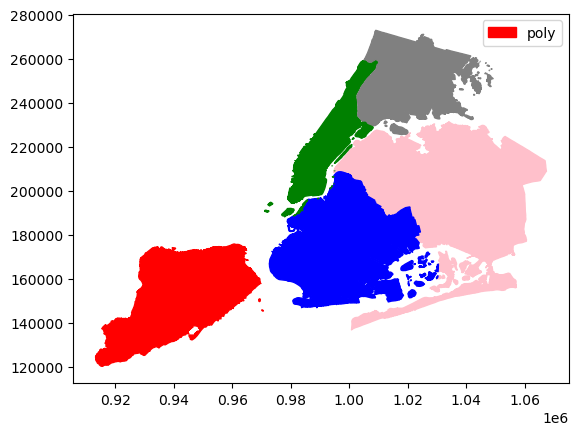

In [ ]:
f, ax = plt.subplots()
_plot_polygon_collection(
    ax, df.geometry, color=["red", "pink", "blue", "green", "grey"]
)
plt.legend()

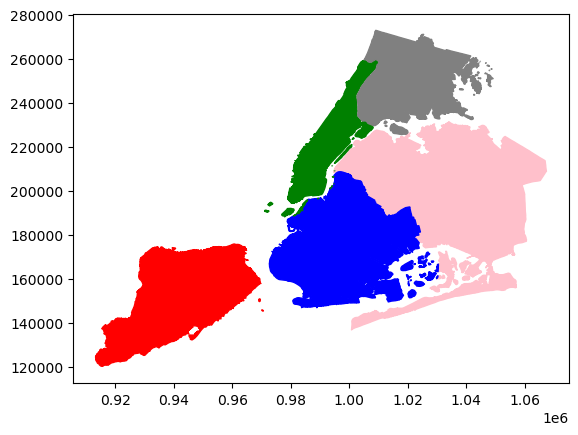

In [11]:
f, ax = plt.subplots()
_plot_polygon_collection(
    ax, df.geometry, color=["red", "pink", "blue", "green", "grey"]
)

In [13]:
import shapely

import geopandas as gpd

countries = gpd.read_file(
    "https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_0_countries.zip"
)

europe = countries[
    (countries.CONTINENT == "Europe") & (countries.SOVEREIGNT != "Russia")
]
europe = europe.clip(shapely.box(-25, 35, 42, 72)).to_crs(3035)

done = europe[
    europe.SOVEREIGNT.isin(
        ["Czechia", "Germany", "Lithuania", "Slovakia", "Austria", "Poland"]
    )
]

soon = europe[europe.SOVEREIGNT.isin(["France", "Spain", "Belgium", "Netherlands"])]

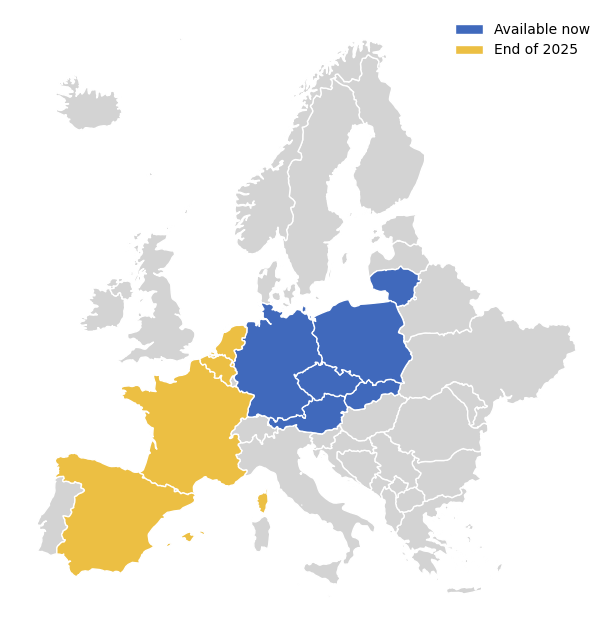

In [22]:
ax = europe.plot(color="lightgray", figsize=(8, 8), edgecolor="w")
done.plot(ax=ax, color="#4069BC", label="Available now", edgecolor="w")
soon.plot(ax=ax, color="#ECBF43", label="End of 2025", edgecolor="w")
ax.set_axis_off()
plt.legend(frameon=False)
plt.savefig("timeline.svg", bbox_inches="tight")